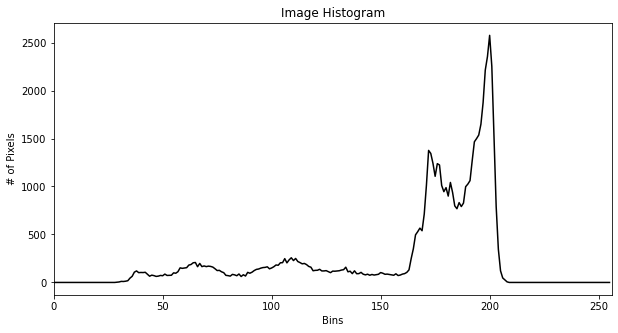

Otsu's threshold value: 137
Riddle-Calvard threshold value: 137.80118246864677


In [6]:
from matplotlib import pyplot as plt
import mahotas
import numpy as np
import cv2

path = r'../images/coins.png'
image = cv2.imread(path)

cv2.startWindowThread()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imshow("Image", image)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set(title='Image Histogram', xlabel='Bins', ylabel='# of Pixels', xlim=[0, 256]);
hist = cv2.calcHist([blurred], [0], None, [256], [0, 256])
ax.plot(hist, color='k')
plt.show()

T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold value: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
cv2.imshow("Otsu", thresh)

T = mahotas.thresholding.rc(blurred)
print("Riddle-Calvard threshold value: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
cv2.imshow("Riddle-Calvard", thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()